In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/employ.csv'
df = (
    pd.read_csv(url, parse_dates=['DATE'])
    .drop(columns='Unnamed: 0')
    .dropna()
    .pivot_table(index='DATE', columns=['GEO', 'AGE', 'UNIT', 'SEX', 'INDIC_EM'], values='Value')
)
df

GEO                               Austria  \
AGE                   From 15 to 24 years   
UNIT       Percentage of total population   
SEX                               Females   
INDIC_EM                Active population   
DATE                                        
2007-01-01                           56.0   
2008-01-01                           56.2   
2009-01-01                           56.2   
2010-01-01                           54.0   
2011-01-01                           54.8   
2012-01-01                           55.4   
2013-01-01                           55.3   
2014-01-01                           55.4   
2015-01-01                           54.1   
2016-01-01                           54.6   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               50.6     
2008-01-01                                               51.3     
2009-01-01                                               50.5     
2010-01-01                                               48.9     
2011-01-01                                               49.8     
2012-01-01                                               50.3     
2013-01-01                                               49.8     
2014-01-01                                               49.9     
2015-01-01                                               48.7     
2016-01-01                                               49.0     

GEO                           \
AGE                            
UNIT                           
SEX                    Males   
INDIC_EM   Active population   
DATE                           
2007-01-01              62.9   
2008-01-01              62.9   
2009-01-01              62.9   
2010-01-01              62.6   
2011-01-01              63.6   
2012-01-01              63.1   
2013-01-01              62.3   
2014-01-01              60.7   
2015-01-01              60.7   
2016-01-01              60.2   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               57.0     
2008-01-01                                               57.6     
2009-01-01                                               55.8     
2010-01-01                                               56.6     
2011-01-01                                               58.0     
2012-01-01                                               57.1     
2013-01-01                                               56.4     
2014-01-01                                               54.3     
2015-01-01                                               54.0     
2016-01-01                                               52.9     

GEO                           \
AGE                            
UNIT                           
SEX                    Total   
INDIC_EM   Active population   
DATE                           
2007-01-01              59.4   
2008-01-01              59.5   
2009-01-01              59.5   
2010-01-01              58.3   
2011-01-01              59.2   
2012-01-01              59.2   
2013-01-01              58.8   
2014-01-01              58.0   
2015-01-01              57.4   
2016-01-01              57.5   

GEO                                                              \
AGE                                     

In [3]:
countries = [geo for geo in df.columns.get_level_values('GEO').unique().tolist() if not geo.startswith('Euro')]
df = df[countries]
employ_f = (
    df
    .xs(
        ('Percentage of total population', 'Active population'),
        level=('UNIT', 'INDIC_EM'),
        axis=1
        )
    .drop('Total', level='SEX', axis=1)
    .loc['2015']
    .melt()
)
employ_f.head()

,GEO,AGE,SEX,value
0,Austria,From 15 to 24 years,Females,54.1
1,Austria,From 15 to 24 years,Males,60.7
2,Austria,From 25 to 54 years,Females,84.4
3,Austria,From 25 to 54 years,Males,91.6
4,Austria,From 55 to 64 years,Females,40.2


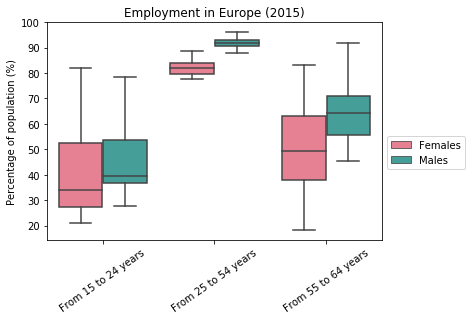

In [4]:
sns.boxplot(x="AGE", y='value', hue="SEX", data=employ_f, palette=("husl"), showfliers=False)
plt.xlabel('')
plt.xticks(rotation=35)
plt.ylabel('Percentage of population (%)')
plt.title('Employment in Europe (2015)')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()